In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [61]:
def PlotHisto(topic, sInput):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Uncertainty'].isin(sInput.keys())].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sInput)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [45]:
def PlotCompare(topic, leftLegned=(1,1), rightLegend=(1,0.2)):
    dfPlot = df.sort_values('Input Uncertainty')
    if 'Value Diff' not in dfPlot.columns:
        dfPlot['Value Diff'] = df['Mean']/df['Value'] - 1
    if 'Uncertainty Diff' not in dfPlot.columns:
        dfPlot['Uncertainty Diff'] = df['Deviation']/df['Uncertainty'] - 1

    fig, ax = plt.subplots()
    ax.set_title('Sampled vs Variance Arithmetic for ' + topic)
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    ax.set_xscale('log')
    ax.set_ylabel('Sampled vs Variance Arithmetic Error Ratio')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Value Diff'], f'g-', label='Mean vs Value')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Uncertainty Diff'], f'b-', label='Deviation vs Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    ax2.plot(dfPlot['Input Uncertainty'], dfPlot['Normalized Error Deviation'], f'm--', label='Error Deviation')

    ax.grid(True)
    ax.legend(bbox_to_anchor=leftLegned)
    ax2.legend(bbox_to_anchor=rightLegend)

In [167]:
def PlotEdge(valueFunc, topic, xLabel, leftLegned=(1.1,1), rightLegend=(1.1,0.2), sigma=0):
    fig, ax = plt.subplots()
    ax.set_title(f'Largest $\delta x$ for {topic}')
    ax.set_xlabel(xLabel)
    #ax.set_xscale('log')
    ax.set_ylabel(r'Largest $\delta x$')
    ax.grid(True)
    ax.plot(df['Edge Value'], df['Edge Uncertainty'], f'b-', label=r'Largest $\delta x$')
    if sigma:
            ax.plot(df['Edge Value'], df['Edge Value']/sigma, f'b--', label=r'$1/\sigma = 0.2$')

    ax2 = ax.twinx()
    ax2.set_ylabel('Uncertainty')
    ax2.plot(df['Edge Value'], df['Value'] - valueFunc(df['Edge Value']), 'c--', label='Uncertainty Bias')
    ax2.plot(df['Edge Value'], df['Uncertainty'], 'm--', label='Uncertainty')

    ax.legend(bbox_to_anchor=leftLegned)
    ax2.legend(bbox_to_anchor=rightLegend)

# Convergence Edge

In [168]:
df = pd.read_csv("../Python/Output/PowerAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-6.0,0.154,1.894787,6.733063,NotMonotonicException: 1.000000e+00~1.550e-01*...
1,-5.8,0.156,1.851423,6.365572,NotMonotonicException: 1.000000e+00~1.570e-01*...
2,-5.6,0.158,1.807601,5.985427,NotMonotonicException: 1.000000e+00~1.590e-01*...
3,-5.4,0.160,1.763539,5.596590,NotMonotonicException: 1.000000e+00~1.610e-01*...
4,-5.2,0.162,1.719451,5.203107,NotMonotonicException: 1.000000e+00~1.630e-01*...


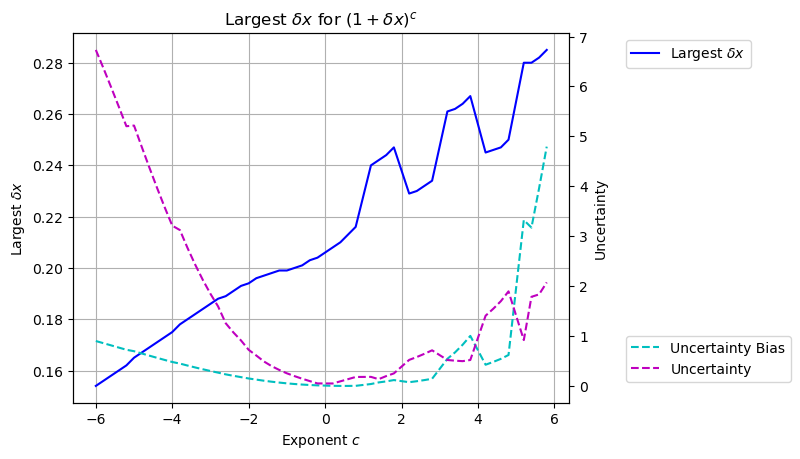

In [169]:
PlotEdge(lambda edgeVal: 1, topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$')

In [170]:
df = pd.read_csv("../Python/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-3.141593,0.73,-9.381961e-17,0.572515,NotMonotonicException: sin(-3.141593e+00~7.400...
1,-2.945243,0.73,-1.494578e-01,0.564399,NotMonotonicException: sin(-2.945243e+00~7.400...
2,-2.748894,0.74,-2.910250e-01,0.545023,NotMonotonicException: sin(-2.748894e+00~7.500...
3,-2.552544,0.76,-4.162126e-01,0.516232,NotMonotonicException: sin(-2.552544e+00~7.700...
4,-2.356194,1.02,-4.203056e-01,0.568633,NotMonotonicException: sin(-2.356194e+00~1.030...


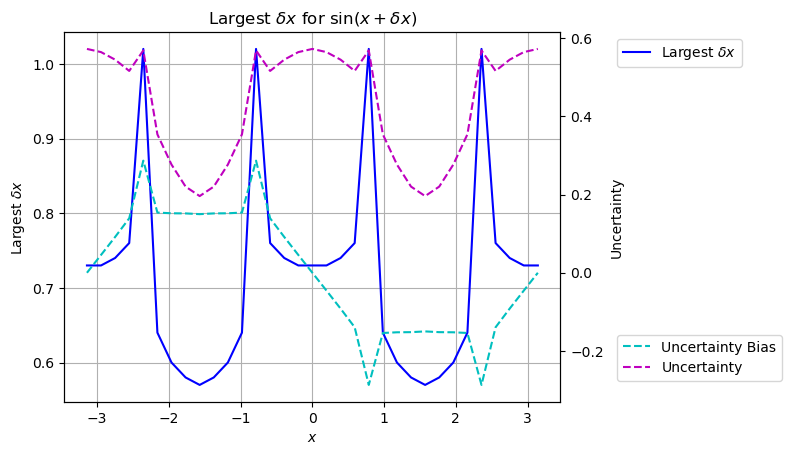

In [171]:
PlotEdge(lambda edgeVal: np.sin(edgeVal), topic=r'$\sin(x + \delta x)$', xLabel=r'$x$')

In [172]:
df = pd.read_csv("../Python/Output/LogEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,0.0625,0.01,-2.785929,0.165687,NotMonotonicException: log(6.250000e-02~2.000e...
1,0.1250,0.02,-2.092782,0.165687,NotMonotonicException: log(1.250000e-01~3.000e...
2,0.1875,0.03,-1.687317,0.165687,NotMonotonicException: log(1.875000e-01~4.000e...
3,0.2500,0.05,-1.407704,0.212005,NotMonotonicException: log(2.500000e-01~6.000e...
4,0.3125,0.06,-1.182761,0.202419,NotMonotonicException: log(3.125000e-01~7.000e...


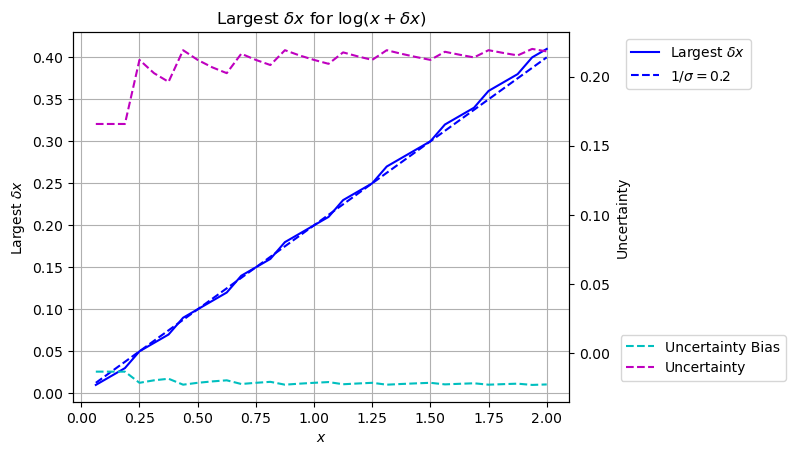

In [173]:
PlotEdge(lambda edgeVal: np.log(edgeVal), topic=r'$\log(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.45,0.2), sigma=5)

# Power

## Square

In [60]:
df = pd.read_csv("../Python/Output/SquareAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,0,1.000000e-10,9.999857e-21,1.414086e-20,9.942977e-21,1.402926e-20,-0.004022,0.992108,0,...,0.017958,0.015577,0.013032,0.010170,0.008678,0.006736,0.006347,0.005029,0.004640,0.001891
1,2,0,1.000000e-09,9.999857e-19,1.414086e-18,1.002417e-18,1.423549e-18,0.001719,1.006692,0,...,0.017695,0.014310,0.012826,0.010801,0.008704,0.006812,0.006495,0.005206,0.004715,0.001862
2,2,0,1.000000e-08,9.999857e-17,1.414086e-16,9.983929e-17,1.406721e-16,-0.001126,0.994791,0,...,0.018098,0.015789,0.012273,0.010730,0.008584,0.007511,0.006459,0.005202,0.004353,0.001768
3,2,0,1.000000e-07,9.999857e-15,1.414086e-14,1.006261e-14,1.429933e-14,0.004438,1.011207,0,...,0.018139,0.015272,0.013154,0.010758,0.008885,0.007002,0.005773,0.005251,0.004269,0.002088
4,2,0,1.000000e-06,9.999857e-13,1.414086e-12,1.001682e-12,1.407302e-12,0.001199,0.995203,0,...,0.018246,0.015331,0.012805,0.010586,0.008510,0.007466,0.005636,0.005012,0.003907,0.002035


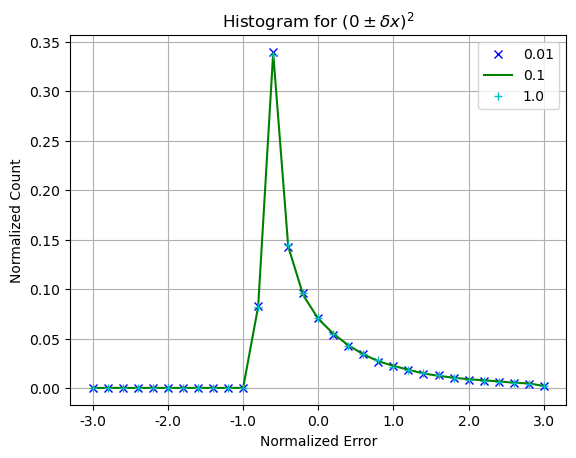

In [62]:
PlotHisto(topic=r'$(0 \pm \delta x)^2$', sInput={0.01: 'bx', 0.1: 'g-', 1: 'c+'})

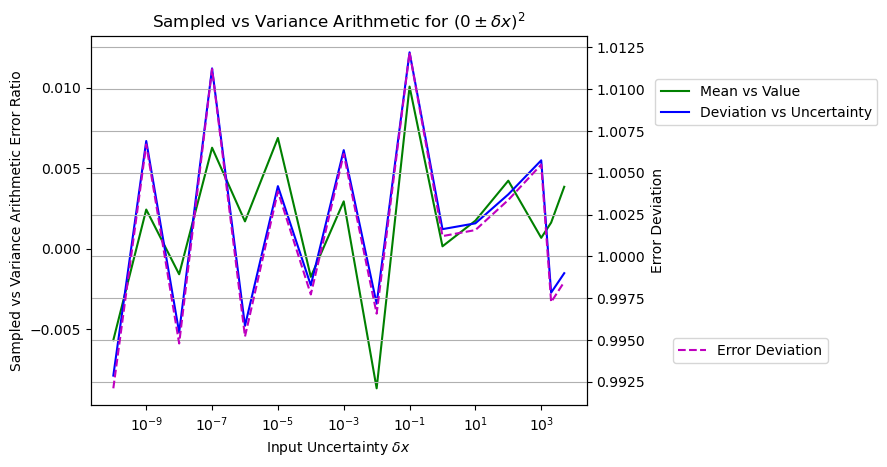

In [46]:
PlotCompare(topic=r'$(0 \pm \delta x)^2$', leftLegned=(1.6,0.9), rightLegend=(1.5,0.2))

## Inversion

In [73]:
df = pd.read_csv("../Python/Output/InversionAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,-1,1,0.199987,1.046235,0.249961,1.046687,0.251418,0.001806,1.005828,0,...,0.025129,0.019424,0.014388,0.010923,0.008714,0.007275,0.005370,0.004448,0.003435,0.001378
1,-1,1,0.100000,1.010316,0.104291,1.010294,0.104480,-0.000209,1.001812,0,...,0.031447,0.024354,0.019467,0.014772,0.011326,0.008363,0.006691,0.004282,0.003255,0.001421
2,-1,1,0.000100,1.000000,0.000100,1.000000,0.000100,-0.002994,1.002630,135,...,0.038448,0.030185,0.021812,0.015484,0.010500,0.007070,0.004954,0.003049,0.001715,0.000572
3,-1,1,0.000200,1.000000,0.000200,1.000000,0.000200,-0.000844,0.998476,133,...,0.038299,0.029797,0.022167,0.015771,0.010858,0.007038,0.004732,0.002647,0.001584,0.000451
4,-1,1,0.000500,1.000000,0.000500,1.000001,0.000500,0.000641,1.000088,129,...,0.037908,0.030529,0.022759,0.016182,0.010928,0.006808,0.004201,0.002737,0.001594,0.000511


In [74]:
df['Input Uncertainty'].unique()

array([1.999871e-01, 1.000000e-01, 1.000000e-04, 2.000000e-04,
       5.000000e-04, 1.000000e-03, 2.000000e-03, 5.000000e-03,
       1.000000e-02, 2.000000e-02, 5.000000e-02])

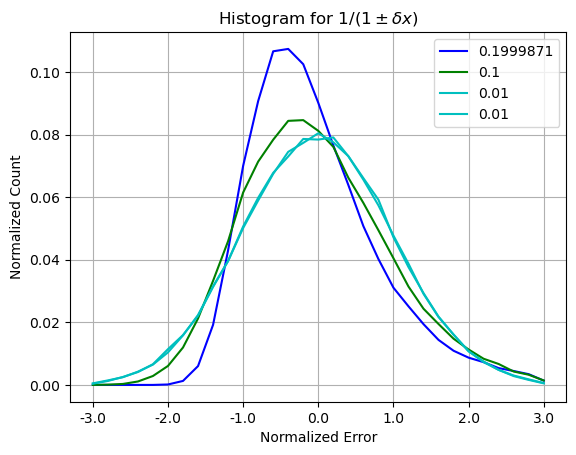

In [75]:
PlotHisto(topic=r'$1/(1 \pm \delta x)$', sInput={0.1999871: 'b-', 0.1: 'g-', 0.01: 'c-'})

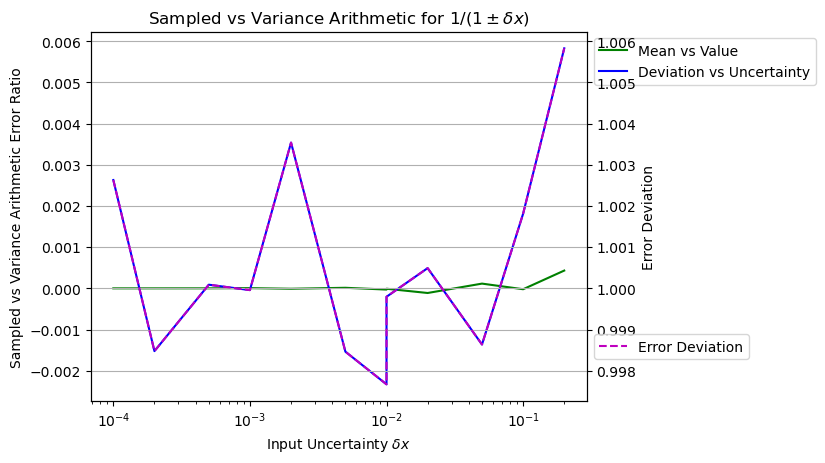

In [76]:
PlotCompare(topic=r'$1/(1 \pm \delta x)$')

## Square Root

In [123]:
df = pd.read_csv("../Python/Output/SquareRootAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.5,1,0.0001,1.0,0.00005,1.000000,0.000050,-0.001872,0.999579,151,...,0.038390,0.029806,0.022725,0.016407,0.010490,0.007130,0.004152,0.002678,0.001885,0.000421
1,0.5,1,0.0002,1.0,0.00010,1.000000,0.000100,-0.002259,1.001280,147,...,0.038977,0.029762,0.023164,0.015824,0.010429,0.007410,0.004332,0.002858,0.001574,0.000692
2,0.5,1,0.0005,1.0,0.00025,1.000000,0.000250,-0.000296,1.001136,119,...,0.039000,0.030117,0.022367,0.015981,0.010868,0.007178,0.004542,0.002948,0.001574,0.000602
3,0.5,1,0.0010,1.0,0.00050,0.999997,0.000500,-0.006283,1.000422,146,...,0.038608,0.029633,0.022323,0.015313,0.010730,0.007230,0.004242,0.002958,0.001695,0.000461
4,0.5,1,0.0020,1.0,0.00100,0.999998,0.001001,-0.001419,1.001075,162,...,0.038936,0.029629,0.021595,0.016048,0.011765,0.006931,0.004513,0.002437,0.001595,0.000471


In [78]:
df['Input Uncertainty'].unique()

array([1.00e-04, 2.00e-04, 5.00e-04, 1.00e-03, 2.00e-03, 5.00e-03,
       1.00e-02, 2.00e-02, 5.00e-02, 2.12e-01, 2.00e-01, 1.00e-01])

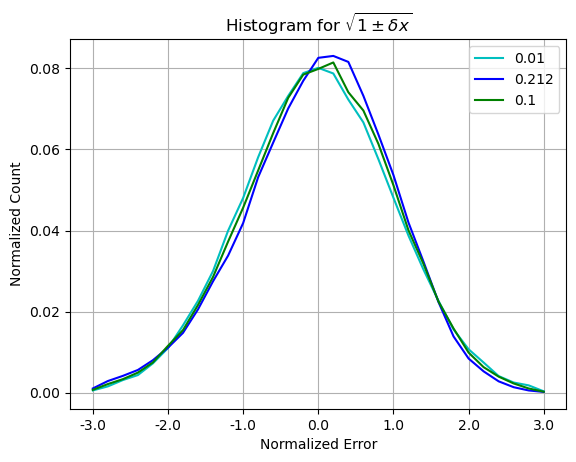

In [79]:
PlotHisto(topic=r'$\sqrt{1 \pm \delta x}$', sInput={0.212: 'b-', 0.1: 'g-', 0.01: 'c-'})

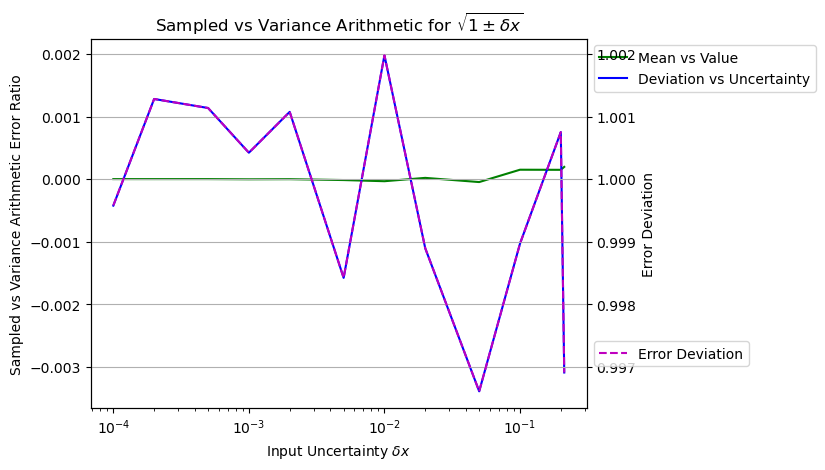

In [80]:
PlotCompare(topic=r'$\sqrt{1 \pm \delta x}$')

## Expansion

In [134]:
df = pd.read_csv("../Python/Output/PowerExpansion.txt", sep='\t')
df.head()

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
0,power,-1,1.0,0.19,2,1.000000,0.000000,3.610000e-02,1.604942e-35,0.036099,3.759893e-35,0.036099,1.618180e-35
1,power,-1,1.0,0.19,4,1.036099,0.036099,1.303210e-03,4.183152e-38,0.003909,1.131336e-36,0.010424,2.738582e-36
2,power,-1,1.0,0.19,6,1.040009,0.046524,4.704588e-05,8.177288e-41,0.000705,5.928567e-38,0.003244,2.596625e-37
3,power,-1,1.0,0.19,8,1.040714,0.049767,1.698356e-06,1.420896e-43,0.000178,5.198850e-39,0.001179,3.298049e-38
4,power,-1,1.0,0.19,10,1.040892,0.050946,6.131066e-08,2.314658e-46,0.000057,6.914483e-40,0.000499,5.753926e-39


In [139]:
df[(df['Input Uncertainty']==0.201) & (df['Order']>100)].head(10)

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
742,power,-1,1.0,0.201,122,1.046800,0.064028,9.770550e-86,5.725888e-201,3.713321e-07,3.571716e-43,0.000045,4.294475e-41
743,power,-1,1.0,0.201,124,1.046801,0.064073,3.947400e-87,9.499242e-204,3.696816e-07,3.598434e-43,0.000045,4.398567e-41


In [165]:
def PlotExpansion(topic, param, sInputUncertainty={0.201: 'r', 0.200: 'b', 0.199: 'g'}):
    fig, ax = plt.subplots()
    ax.set_title('Taylor Expansion of Variance for ' + topic)
    ax.set_xlabel('Expansion Order')
    ax.set_ylabel('Taylor Expansion Terms')
    ax.set_yscale('log')
    ax.grid(True)
    
    for unc, c in sInputUncertainty.items():
        dfPlot = df[(df['Parameter']==param) & (df['Input Uncertainty']==unc)].sort_values('Order')
        ax.plot(dfPlot['Order'], dfPlot['New Variance Value'], f'{c}-', label=f'Variance $\delta x$={unc}')
        ax.plot(dfPlot['Order'], dfPlot['New Value Value'], f'{c}--', label=f'Value $\delta x$={unc}')
        
    ax.legend(bbox_to_anchor=(1,1))


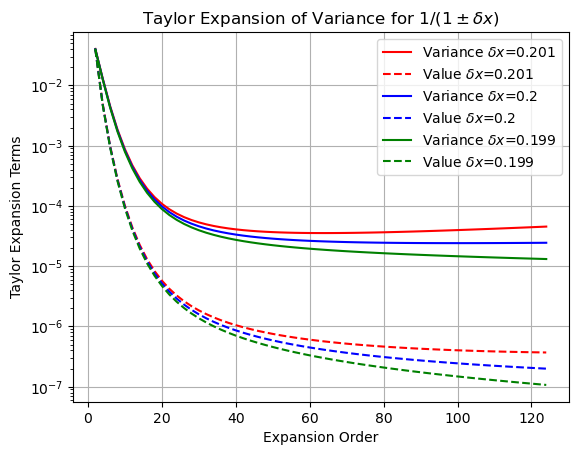

In [166]:
PlotExpansion(topic=r'$1/(1 \pm \delta x)$', param=-1)

# Sin

## PI

In [191]:
df = pd.read_csv("../Python/Output/SinAtPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0,0.0001,0.0,0.0001,-9.092513e-07,0.000100,-0.009093,0.995177,14,10,...,0.039395,0.029070,0.023156,0.016540,0.010124,0.006215,0.004411,0.002807,0.001504,0.000401
1,0,0.0002,0.0,0.0002,1.394366e-06,0.000199,0.006972,0.996912,12,11,...,0.041195,0.031372,0.022351,0.015937,0.009823,0.006916,0.004410,0.002606,0.001704,0.000702
2,0,0.0005,0.0,0.0005,-2.040099e-06,0.000496,-0.004080,0.992393,11,10,...,0.036276,0.029662,0.024151,0.015132,0.009921,0.007716,0.004008,0.003407,0.000701,0.000401
3,0,0.0010,0.0,0.0010,-1.760272e-05,0.000991,-0.017603,0.990644,16,12,...,0.035600,0.028981,0.020858,0.017850,0.010830,0.006619,0.002808,0.001905,0.001404,0.000501
4,0,0.0020,0.0,0.0020,1.369467e-06,0.001975,0.000685,0.987592,19,13,...,0.039125,0.030297,0.021669,0.015249,0.008628,0.007223,0.004715,0.002608,0.001204,0.000301


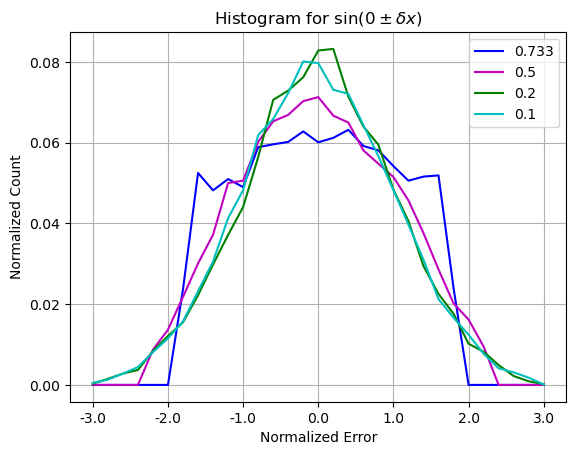

In [193]:
PlotHisto(topic=r'$\sin(0 \pm \delta x)$', sInput={0.733: 'b-', 0.5: 'm-', 0.2: 'g-', 0.1: 'c-'})

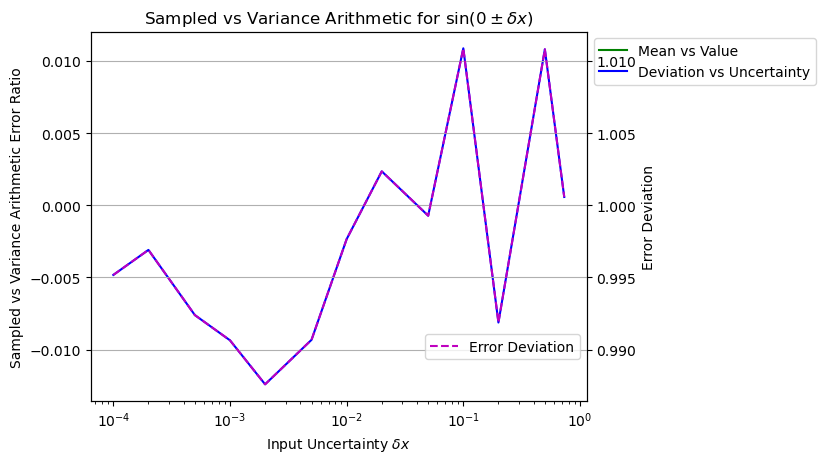

In [91]:
PlotCompare(topic=r'$\sin(0 \pm \delta x)$')

## PI/2

In [187]:
df = pd.read_csv("../Python/Output/SinAtHalfPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,1.570796,0.0001,1.000000,7.070430e-09,1.000000,0.000000e+00,0.016264,0.980958,202,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.570796,0.0002,1.000000,2.828172e-08,1.000000,9.657056e-08,-0.007525,1.017180,238,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.570796,0.0005,1.000000,1.767607e-07,1.000000,1.861154e-07,-0.011204,1.017037,239,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.570796,0.0010,1.000000,7.070426e-07,1.000000,6.975749e-07,0.002820,0.982258,203,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.570796,0.0020,0.999998,2.828166e-06,0.999998,2.671675e-06,0.027696,0.944714,179,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


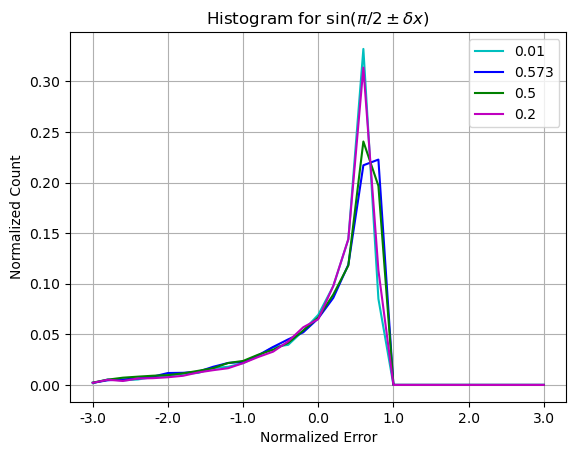

In [190]:
PlotHisto(topic=r'$\sin(\pi/2 \pm \delta x)$', sInput={0.573: 'b-', 0.5: 'g-', 0.2: 'm-', 0.01: 'c-'})

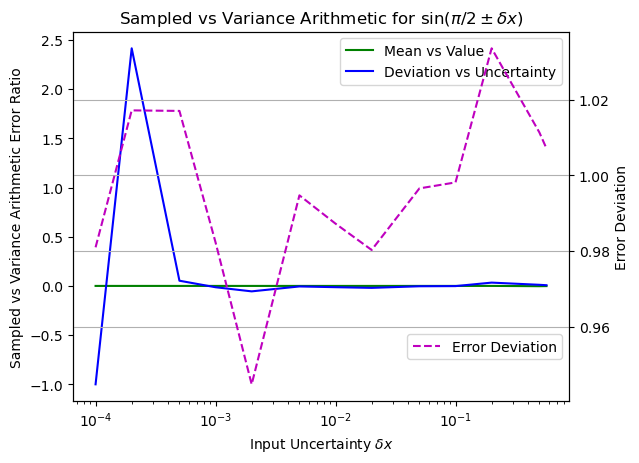

In [189]:
PlotCompare(topic=r'$\sin(\pi/2 \pm \delta x)$')

## PI/4

In [175]:
df = pd.read_csv("../Python/Output/SinAtQuarterPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.785398,0.0001,0.707107,0.000071,0.707106,0.000070,-0.004953,0.992315,10,14,...,0.040798,0.030974,0.021151,0.014635,0.009723,0.006215,0.004812,0.002005,0.001804,0.000401
1,0.785398,0.0002,0.707107,0.000141,0.707108,0.000141,0.007698,0.993982,13,11,...,0.039595,0.030473,0.021652,0.014134,0.012330,0.006816,0.004210,0.002907,0.002005,0.000401
2,0.785398,0.0005,0.707107,0.000354,0.707109,0.000352,0.007722,0.994793,10,13,...,0.036584,0.031773,0.024256,0.015636,0.009321,0.006515,0.004510,0.002706,0.001704,0.000501
3,0.785398,0.0010,0.707106,0.000707,0.707103,0.000710,-0.005173,1.004576,20,10,...,0.041324,0.030792,0.021765,0.014343,0.009428,0.007623,0.004313,0.003310,0.001304,0.000401
4,0.785398,0.0020,0.707105,0.001414,0.707114,0.001422,0.006328,1.005456,11,13,...,0.040196,0.031676,0.022654,0.016540,0.010626,0.006415,0.004711,0.003508,0.001604,0.000902


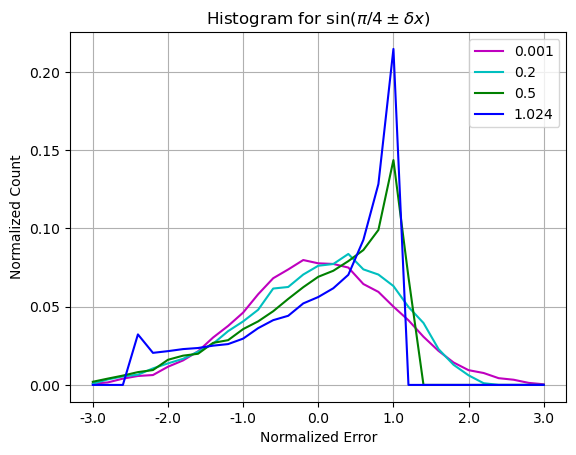

In [185]:
PlotHisto(topic=r'$\sin(\pi/4 \pm \delta x)$', sInput={1.024: 'b-', 0.5: 'g-', 0.2: 'c-', 0.001: 'm-'})

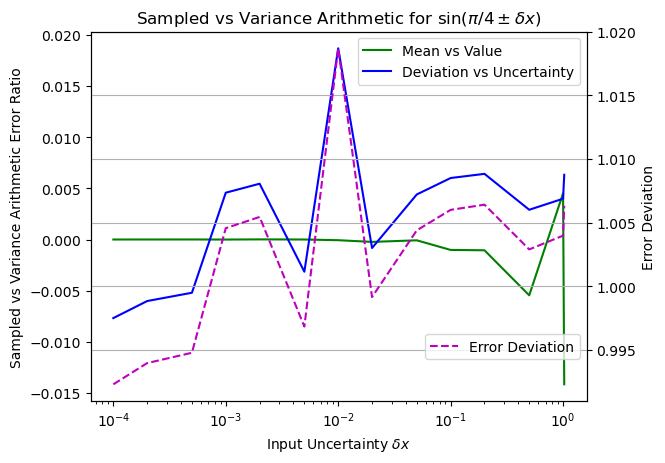

In [108]:
PlotCompare(topic=r'$\sin(\pi/4 \pm \delta x)$')